# Titanic Dataset

This notebook is being used by me to study the basics of Data Science and Machine Learning. It can also be used by anyone as a point to start learning more about these concepts. 

This is the first version that I made. It is complete, however there are obvius problems with my approach. See the V1 if you want a better analysis.

## Basic Configuration

In order to do our analysis, we need some python libraries. This project uses, until now, the following libraries. We also need to open the data that was downloaded from the Kaggle website.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# Creating a pandas DataFrame using the csv
df_titanic = pd.read_csv('data/titanic.csv')

## Understanding the Data

In order to do anything, we first need to know how the data we have is organized and what each of the columns of the DataFrame means.

In [3]:
# Now, we are going to visualize the information we have at our disposal
print(df_titanic.info())    # This shows us the type of each column
df_titanic.head(10)         # Printing the first 10 entries on the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


As we can see, there are lots of missing values inside our DataFrame. This is harmful to our analysis, because they can inflect into our results.

### Treating the data

#### Selecting only the useful information

Not every column of the Dataframe is useful to our analysis of the problem. So we are going to drop what we are not going to use. According with Kagle, this is what each column means:

Survival = 1 if the passenger survived, and 0 case he died.

PClass = The ticket class of the passenger.

Sex = The sex of the passenger.

Age = The age of the passenger, in years, by the time of the accident.

SibSp = Number of sibilings and/or spouses aboard.

Parch = Number of parents and/or children aboard.

Ticket = Ticker number.

Fare = Passenger Fare.

Cabin = Cabin number.

Embarked = Port of embarcation. (C = Cherbourg, Q = Queenstown, S = Southampton)

In a first analysis, the name, ticket, fare and cabin does not seen relevant to our analysis. So we are getting rid of them.

In [4]:
# Dropping the useless columns
df_work = df_titanic[["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]]
df_work.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
5,6,0,3,male,NaN,0,0,Q
6,7,0,1,male,54.0,0,0,S
7,8,0,3,male,2.0,3,1,S
8,9,1,3,female,27.0,0,2,S
9,10,1,2,female,14.0,1,0,C


#### Dealing with missing values

The simplest way of treating the missing values is to drop every entry that hasn't a value that is going to be useful to us. 

In [5]:
df_work = df_work.dropna(how="any")
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Embarked       712 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 50.1+ KB


#### Renaming the embark location

This will allow us a better visualization

In [6]:
df_work = df_work.replace({"C":"Cherbourg", "Q":"Queenstown", "S":"Southampton"})
df_work.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,Southampton
1,2,1,1,female,38.0,1,0,Cherbourg
2,3,1,3,female,26.0,0,0,Southampton
3,4,1,1,female,35.0,1,0,Southampton
4,5,0,3,male,35.0,0,0,Southampton


### Visualizing the variables

This is going to give us a better understanding of how the variables are distributed and also some insights about survivors and their characteristics.

#### Sex distribution

Let's see how many man and women we had in the ship and if there is some discrepancy between their survivor rate in the accident.

In [7]:
labels = 'male', 'female'
df_work.groupby(df_work.Sex).sum().plot.pie(['PassengerId'], figsize = (6,6), autopct='%1.1f%%')
df_work.groupby(df_work.Sex).sum().plot.pie(['Survived'], figsize = (6,6), autopct='%1.1f%%')

As we can see, the majority of the ship tripulants were males. However, women were more likely to survive.

#### Class analysis

Let's verify if the class of each person contributed to their survivor.

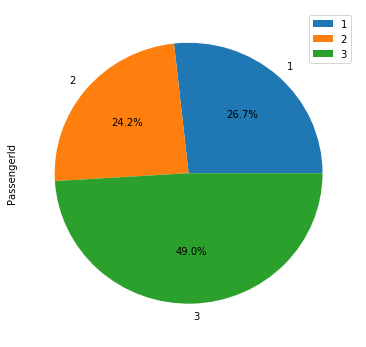

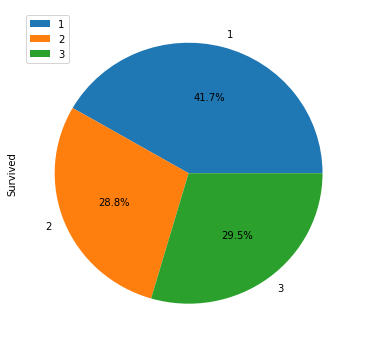

In [8]:
df_work.groupby(df_work.Pclass).sum().plot.pie('PassengerId', figsize=(6,6),autopct='%1.1f%%')
df_work.groupby(df_work.Pclass).sum().plot.pie('Survived', figsize=(6,6),autopct='%1.1f%%')

As we can see, almost half of the passengers were from the third class, however, almost half of the survivors were of the first class. Also, the survivorship rate between second and third class is almost the same.

#### Embark location

I doubt it, however, let's see if we can find anything useful using where the person embarked.

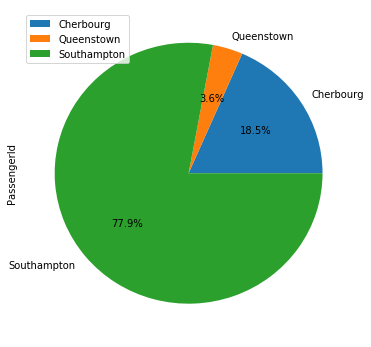

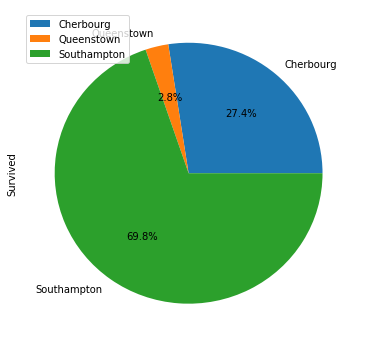

In [9]:
df_work.groupby(df_work.Embarked).sum().plot.pie('PassengerId', figsize=(6,6),autopct='%1.1f%%')
df_work.groupby(df_work.Embarked).sum().plot.pie('Survived', figsize=(6,6),autopct='%1.1f%%')

As we can see, there is no significant difference between the percentages of survivors and the total of the ship for us to infer anything, as expected.

#### Age distribuition

Let's see how age was distributed in the ship at the moment of the accident

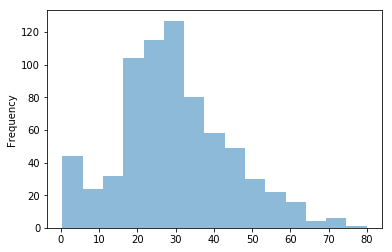

In [10]:
df_work.Age.plot.hist(bins = 15, alpha=0.5)

### Treating the Data

We need to treat our data before we apply some of our classification algorithms.

#### Transforming non-numbered values into numbered values

This is done because we cannot classify non-numbered values. So our columns like Embarked should be transformed into numbers for us to apply our methods. The relation used is shown below.

Male -> 0 / Female -> 1

Southampton -> 0 / Cherbourg -> 1 / Queenstown -> 2

In [11]:
map_sex = {'male': 0, 'female': 1}
map_embarked = {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}

df_work['Sex'] = df_work['Sex'].map(map_sex)
df_work['Embarked'] = df_work['Embarked'].map(map_embarked)

# As we can see, we only have numbered values
df_work.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,0
1,2,1,1,1,38.0,1,0,1
2,3,1,3,1,26.0,0,0,0
3,4,1,1,1,35.0,1,0,0


#### Normalizing the data

Age is formed by a wide range of values and they are far greater than the others, so we are going to normalize these values. This may not be the best way of doing it, however, it will work for a preliminar analysis.

In [12]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
age = df_work[['Age']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
age_scaled = min_max_scaler.fit_transform(age)

# Run the normalizer on the dataframe
df_work['Age'] = pd.DataFrame(age_scaled)

# Something happened and NaN ages appeared, will solve it later
df_work = df_work.dropna(how='any')
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 710
Data columns (total 8 columns):
PassengerId    564 non-null int64
Survived       564 non-null int64
Pclass         564 non-null int64
Sex            564 non-null int64
Age            564 non-null float64
SibSp          564 non-null int64
Parch          564 non-null int64
Embarked       564 non-null int64
dtypes: float64(1), int64(7)
memory usage: 39.7 KB


Now, we are going to index our dataframe based on the passengerId so it does not screws up our analysis.

In [13]:
df_work = df_work.set_index(['PassengerId'])

### Applying the K-Nearest Neighbors

Now we can apply the K-Nearest Neighbors to our problem. 

To maintain simplicity and to verify our results, I am not going to use the Titanic Test Dataset yet, but will divide the dataset we already have into train and test set.

Then, we need to separate our values of interest (what we will call X) and the label aka the result (what we will call y)

In [14]:
from sklearn.model_selection import train_test_split

# df is our dataframe without the Survived column
df = df_work.drop('Survived', axis=1)
y = df_work['Survived']

# This function returns an division in our dataset so we can train and test our algorithm
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Here we create a classifier with 4 neighbors and then fit it with the training data
neighbors = KNeighborsClassifier(n_neighbors = 4)
neighbors.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [16]:
# We make the prediction and then see how much it scored
y_predicted = neighbors.predict(X_test)
neighbors.score(X_test, y_test)

0.7345132743362832

In [17]:
# Now we are going to see the confusion matrix of our implementation. The sum of the positions [0][0] and [1][1] is the
# amount of right choices we made. The sum of the other diagonal is our incorrect guesses.

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_predicted)
print(conf_matrix)

[[53  7]
 [23 30]]


### Analysis and Conclusion

This is certanly not the best approach, however, as my first Data Analysis and Machine Learning project, I learned a lot doing it. There are visible erros in this approach and I hope to improve ir overtime as I learn more and more about Data Science and Machine Learning.

I will also add more algorithms so we can compare different approaches and study why some of them are better than the others.